In [23]:
import logging
import random
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### A basic perceptron

In [34]:

class Perceptron:
    
    def __init__(self,learning_rate = 0.1, max_epochs = 50):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.random_state =1
                        
        # error log for training
        self.errors_ = []

    
    def fit(self, X, y):
        
        # draw random numbers from a normal distribution with stddev 0.01
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc = 0.0, scale = 0.01, size = 1  + X.shape[1])
        for _ in range(0, self.max_epochs):
            error = 0.0
            for x, expected in zip(X,y):
                weight_update = self.learning_rate * (expected - self.predict_np(x))
                self.weights[1:] += weight_update*x
                self.weights[0] += weight_update
                error += int(weight_update != 0.0)
            self.errors_.append(error)
        return self

    def show_fitting_log(self):
        if self.errors_ == []:
            return False
        plt.plot(range(1, len(p.errors_) + 1), p.errors_, marker = 'o')
        plt.plot(range(1, len(p.errors_) + 1), p.errors_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of updates')
        plt.show()
    
    def show_decision_regions(self, X, y):
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        # map colors to classes based on the number of decision classes
        cmap = ListedColormap(colors[:len(np.unique(y))])  
        
        # plot the decision surface
        
        res = 0.02 # drawing resolution
        
        x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
        x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
        xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, res),
                              np.arange(x2_min, x2_max, res))
        
        Z = self.predict_np(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        for idx,cl in enumerate(np.unique(y)):
            plt.scatter(
                x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor = 'black'
            )
    
    def predict_np(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]


### Iris dataset

In [4]:
s = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
df = pd.read_csv(s, header = None, encoding = "utf-8")
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### See how the data looks like

In [5]:
# 1 if the flower is iris-setosa and -1 if not
y = df.iloc[0:100,4].values
y = np.where(y == "Iris-setosa", -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

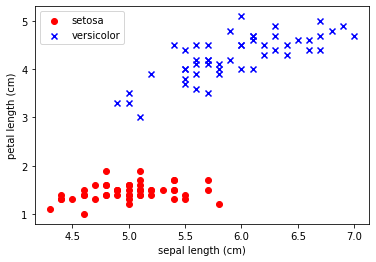

In [6]:
plt.scatter(X[:50,0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

### Train the perceptron model

In [35]:
p = Perceptron(max_epochs = 10)
p.fit(X, y)

### Visualizing the decision boundary

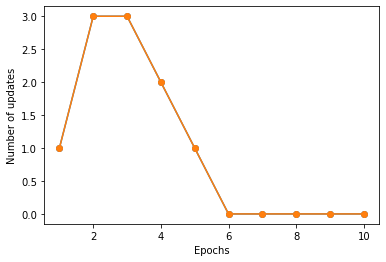

In [36]:
p.show_fitting_log()

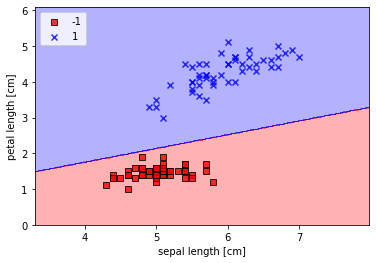

In [39]:
p.show_decision_regions(X,y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()